# Régression linéaire, Ridge, LASSO, Elastic et SVM

## Climate Change: Earth Surface Temperature Data

Le but de ce projet est de **"fitter" des modèles linéaires et non-lineaires** sur des données climatiques.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv("./data/GlobalTemperatures.csv")
   ```


### Data Analysis
2. Supprimer la saisonalité des data en calculant les températures moyennes par année.<br>
    ```
    yearly_temp = df.LandAverageTemperature.resample("Y").mean()
    ```
3. Faites les graphes de ces températures annuelles. Essayez d'y ajouter un intervalle de confiance en vous basant sur la variable `LandAverageTemperatureUncertainty`.
    ```
    https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
    ```


### Models
4. Fittez les modèles suivants sur les data. Consultez la documentation de ces modèles si besoin.
    - **Régression linéaire** `LinearRegression`.<br>
    - **Régression Ridge** `Ridge`.<br>
    - **Régression LASSO** `LASSO`.<br>
    - **Régression Elastic** `Elastic`.<br>
    - **Support Vector Machine Regressor** `SVR`.


5. Faites le graphe de vos data et des prédictions que vous avez obtenues.


### Grid Search
6. Effectuez une **optimisation des paramètres** de vos modèles oar **grid search**, grâce à la fonction `GridSearchCV`.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    - `LinearRegression`: pas de paramètres
    - `Ridge`: paramètre `alpha`
    - `LASSO`: paramètre `alpha`
    - `Elastic`: paramètre `alpha`
    - `SVR`: paramètre `degree`
    
   Fittez les modèles avec leurs paramètres optimaux sur les data.<br>
   Refaites le graphe de vos data et des prédictions que vous avez obtenues.

## Librairies

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from scipy.signal import savgol_filter

# !pip install mlinsights
from mlinsights.mlmodel import PiecewiseRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load data

In [2]:
df = pd.read_csv("./data/GlobalTemperatures.csv")

In [3]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.set_index(["dt"])
df.index = pd.DatetimeIndex(df.index, freq="infer")

In [5]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


## Data Analysis

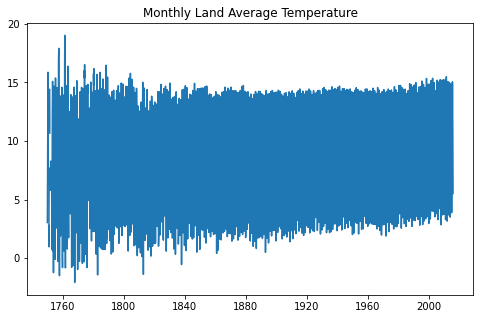

In [6]:
# Monthly temperatures
plt.figure(figsize=(8,5))

plt.plot(df.LandAverageTemperature)
plt.title("Monthly Land Average Temperature")

plt.show()

In [7]:
# Removing seasonality: yearly temperatures
bound = df.LandAverageTemperatureUncertainty.resample("Y").mean()
yearly_temp = df.LandAverageTemperature.resample("Y").mean()

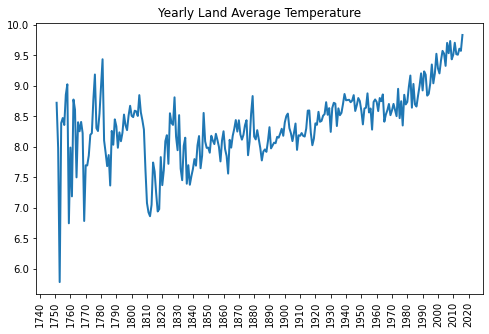

In [8]:
plt.figure(figsize=(8,5))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2)

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.title("Yearly Land Average Temperature")

plt.show()

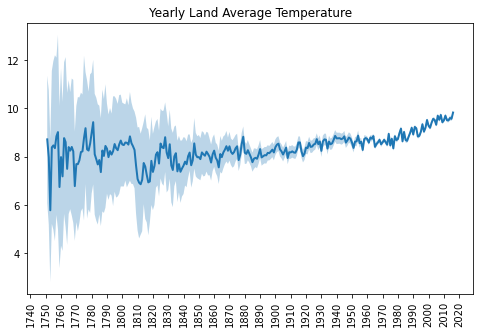

In [9]:
plt.figure(figsize=(8,5))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2)
plt.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.title("Yearly Land Average Temperature")

plt.show()

## Model

In [10]:
X_train = np.arange(len(yearly_temp)).reshape(-1, 1) # need this format
y_train = yearly_temp

In [11]:
models_l = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR()]

In [12]:
models_names_l = ["LinearRegression", "Ridge", "Lasso", "ElasticNet", "SVR"]

In [13]:
results_d = {}

for model, name in zip(models_l, models_names_l):
    
    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    results_d[name] = [model.score(X_train, y_train)]
    results_d[name].append(y_hat)

In [14]:
# results_d

In [15]:
for k, v in results_d.items():
    
    print(f"{k}:", (20-len(k)) * " ", f"score: {v[0]:.4f}")

LinearRegression:      score: 0.3873
Ridge:                 score: 0.3873
Lasso:                 score: 0.3868
ElasticNet:            score: 0.3872
SVR:                   score: 0.5352


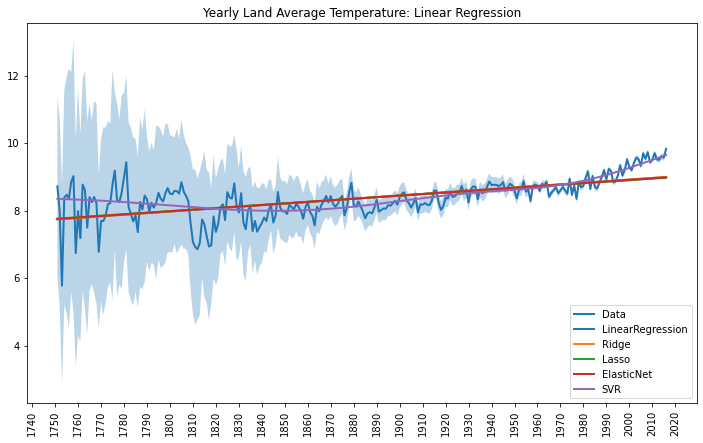

In [16]:
plt.figure(figsize=(12,7))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2, color="C0", label="Data")
plt.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)

for k, v in results_d.items():
    plt.plot(yearly_temp.index, v[1], linewidth=2, label=f"{k}")

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.legend(loc="lower right")
plt.title("Yearly Land Average Temperature: Linear Regression")

plt.show()

- Les différents modèles linéaires semblent donner prédictions confondues. 
- Ceci se confirme avec les scores qui sont très proches les uns des autres.

### Grid Search

In [17]:
models_params_d = {"alpha" : np.logspace(-3, 3, num=7), "degree" : [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [18]:
results_cv_d = {}

for model, name in zip(models_l, models_names_l):
    
    if name in ["Ridge", "Lasso", "ElasticNet"]:
        
        param = {"alpha" : models_params_d["alpha"]}
        model_cv = GridSearchCV(model, param)
        
    elif name == "SVR":
        
        param = {"degree" : models_params_d["degree"]}
        model_cv = GridSearchCV(model, param)
        
    else:
        
        model_cv = model

    model_cv.fit(X_train, y_train)
    y_hat = model_cv.predict(X_train)
    results_cv_d[name] = [model.score(X_train, y_train)]
    
    try:
        results_cv_d[name].append(model_cv.best_params_)
    except:
        results_cv_d[name].append(None)
        
    results_cv_d[name].append(y_hat)

In [19]:
for k, v in results_cv_d.items():
    
    print(f"{k}:", (20-len(k))*" ", f"score: {v[0]:.4f}\t", f"best_params: {v[1]}")

LinearRegression:      score: 0.3873	 best_params: None
Ridge:                 score: 0.3873	 best_params: {'alpha': 1000.0}
Lasso:                 score: 0.3868	 best_params: {'alpha': 0.001}
ElasticNet:            score: 0.3872	 best_params: {'alpha': 0.001}
SVR:                   score: 0.5352	 best_params: {'degree': 1}


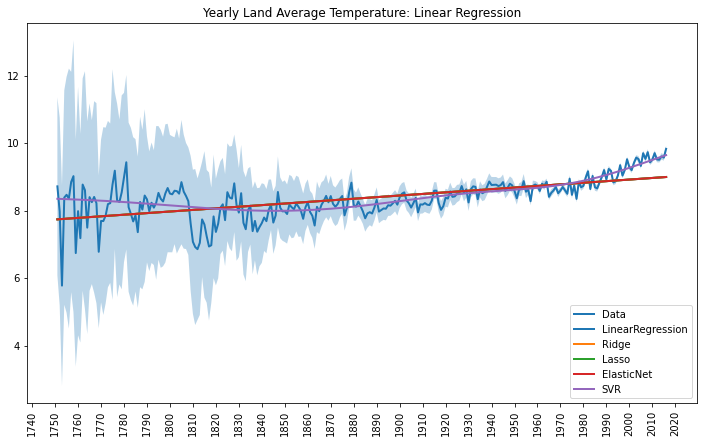

In [20]:
plt.figure(figsize=(12,7))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2, color="C0", label="Data")
plt.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)

for k, v in results_cv_d.items():
    plt.plot(yearly_temp.index, v[2], linewidth=2, label=f"{k}")

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.legend(loc="lower right")
plt.title("Yearly Land Average Temperature: Linear Regression")

plt.show()